# E-commerce Sales Analysis & Customer Segmentation
---
## Project Overview and Goal
The goal of this project is to analyze the sales data of an online retail company to identify trends, understand customer behavior, and provide actionable insights to improve sales and marketing strategies. You will act as a data analyst for a fictional e-commerce store called "Trendify."

## Business Context
Trendify is an online retailer that sells a variety of products. The company has been collecting sales data for the past year and wants to leverage this data to make more informed business decisions. They are particularly interested in understanding which products are selling well, who their most valuable customers are, and how they can optimize their marketing efforts.

## Key Question
1. What are the overall sales trends on a monthly and quarterly basis?
2. Which are the top 10 best-selling products by revenue and quantity?
3. Who are the top 10 most valuable customers?
4. What is the geographical distribution of sales?
5. How can we segment our customers based on their purchasing behavior?

## Dataset
"Online Retail" dataset from the UCI Machine Learning Repository

---
#### Import Library

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

#### Read the dataset

In [2]:
sales = pd.read_csv("online_retail_II.csv", engine='pyarrow')

# See the top 5 data
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# See the dataset information
print(sales.info())
print()
print("Missing values on dataset:\n", sales.isna().sum())
print()
print("Duplicate values on dataset:\n", sales.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype        
---  ------       --------------    -----        
 0   Invoice      1067371 non-null  object       
 1   StockCode    1067371 non-null  object       
 2   Description  1062989 non-null  object       
 3   Quantity     1067371 non-null  int64        
 4   InvoiceDate  1067371 non-null  datetime64[s]
 5   Price        1067371 non-null  float64      
 6   Customer ID  824364 non-null   float64      
 7   Country      1067371 non-null  object       
dtypes: datetime64[s](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB
None

Missing values on dataset:
 Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Duplicate values on dataset:
 34335


The dataset contain 8 column and 1.067.371 rows. <br>
There are 243.007 missing values of Customer ID and 4.382 missing values of product Description. <br>
There are 34.335 duplicate records in the dataset. <br>
The column 'Customer ID' has the wrong data type.

#### Data Cleaning

In [4]:
# Drop missing values
sales = sales.dropna()
sales.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [5]:
# Drop duplicate
sales = sales.drop_duplicates()
sales.duplicated().sum()

np.int64(0)

In [6]:
# Convert columns data types into the right one
sales['Customer ID'] = sales['Customer ID'].astype('object')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype        
---  ------       --------------   -----        
 0   Invoice      797885 non-null  object       
 1   StockCode    797885 non-null  object       
 2   Description  797885 non-null  object       
 3   Quantity     797885 non-null  int64        
 4   InvoiceDate  797885 non-null  datetime64[s]
 5   Price        797885 non-null  float64      
 6   Customer ID  797885 non-null  object       
 7   Country      797885 non-null  object       
dtypes: datetime64[s](1), float64(1), int64(1), object(5)
memory usage: 54.8+ MB


In [7]:
# Create new column to count the total price
sales['Total Price'] = np.round((sales['Price'] * sales['Quantity']), 2)
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [8]:
# Extract Hour from invoice date
sales['Hour'] = sales['InvoiceDate'].dt.hour

# Extract Day from invoice date
sales['Day'] = sales['InvoiceDate'].dt.day

# Extract Month from invoice date
sales['Month'] = sales['InvoiceDate'].dt.month

# Extract year from invoice date
sales['Year'] = sales['InvoiceDate'].dt.year

# Check the dataset
sales.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Price,Hour,Day,Month,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,7,1,12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7,1,12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,7,1,12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,7,1,12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,7,1,12,2009


In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype        
---  ------       --------------   -----        
 0   Invoice      797885 non-null  object       
 1   StockCode    797885 non-null  object       
 2   Description  797885 non-null  object       
 3   Quantity     797885 non-null  int64        
 4   InvoiceDate  797885 non-null  datetime64[s]
 5   Price        797885 non-null  float64      
 6   Customer ID  797885 non-null  object       
 7   Country      797885 non-null  object       
 8   Total Price  797885 non-null  float64      
 9   Hour         797885 non-null  int32        
 10  Day          797885 non-null  int32        
 11  Month        797885 non-null  int32        
 12  Year         797885 non-null  int32        
dtypes: datetime64[s](1), float64(2), int32(4), int64(1), object(5)
memory usage: 73.0+ MB


#### Exploratory Data Analysis

In [10]:
# Sales trend
sales_trend = sales.groupby(['Year', 'Month'])['Total Price'].sum().reset_index()

# Combine Year and Month into a single datetime column
sales_trend['Period'] = pd.to_datetime(sales_trend[['Year', 'Month']].assign(DAY=1))

sales_trend.head()

,Year,Month,Total Price,Period
0,2009,12,660125.10,2009-12-01
1,2010,1,530436.51,2010-01-01
2,2010,2,487596.42,2010-02-01
3,2010,3,633419.31,2010-03-01
4,2010,4,558007.83,2010-04-01


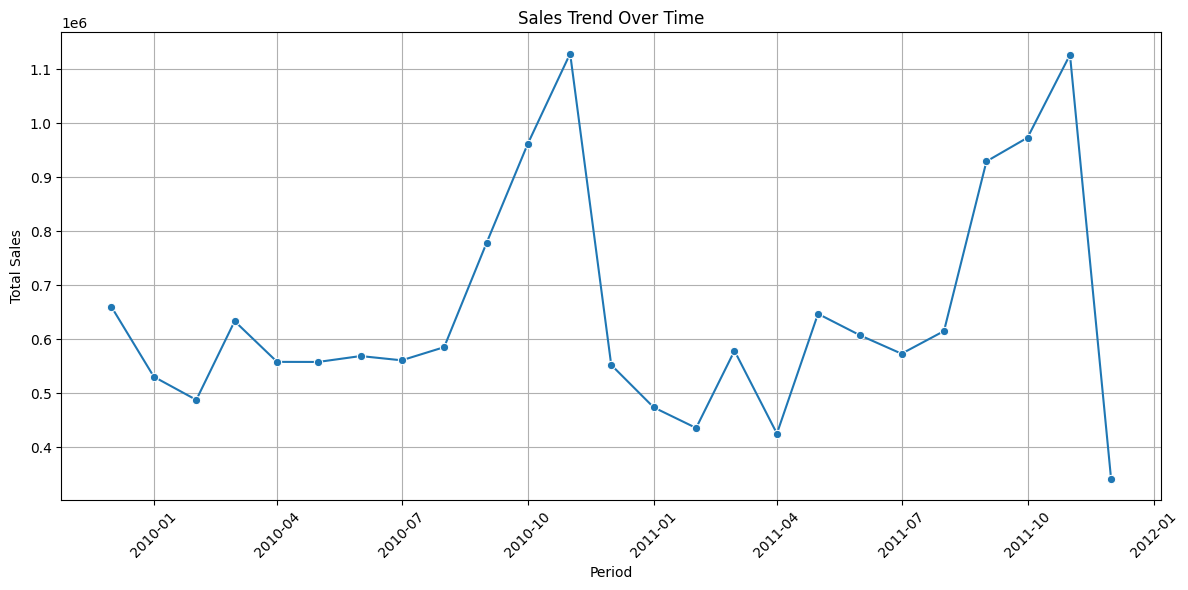

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trend, x='Period', y='Total Price', marker='o')
plt.title('Sales Trend Over Time')
plt.xlabel('Period')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()